In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import folium
from IPython.display import Image
import pickle
import numpy as np

%matplotlib inline

In [2]:
Crisis = pd.read_csv('../data/Crisis.csv')
Crisis.head(2)

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,...,CURRENT SUICIDAL INTENTION/PLAN/ATTEMPT IN PROGRESS,Suicide History/Previous Attempts,Grief due to Suicide Loss,Information about SOSL support group,Third party concerned about anothers suicide risk,CURRENT THOUGHTS/IDEATIONS,Total Suicide Issues,Total Number of Issues,IR Call,Number of Imminent Risk Issues
0,0,82699332,2020-12-31 23:40:00,2020-12-31 23:53:00,13,3769693,116928,Houston,Harris,TX,...,0,0,0,0,0,0,0,4,No,0
1,1,82689642,2020-12-31 22:31:00,2020-12-31 23:00:00,29,-1,136748,NaN,NaN,TN,...,0,0,0,0,0,0,0,2,No,0


In [3]:
CRISIS = Crisis[['CRISIS Issues - Abusive Behavior', 'CRISIS Issues - Call Problems (specify at least 2)', 'CRISIS Issues - Emotional State', 'CRISIS Issues - Financial/Basic Needs', 'CRISIS Issues - Health/Physical', 'CRISIS Issues - Homicide', 'CRISIS Issues - Information or Services Needed', 'CRISIS Issues - Mental Health', 'CRISIS Issues - No Issue Call', 'CRISIS Issues - Other Description', 'CRISIS Issues - Relationships', 'CRISIS Issues - Substances', 'CRISIS Issues - Suicide']]

In [4]:
CRISIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22326 entries, 0 to 22325
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CRISIS Issues - Abusive Behavior                    985 non-null    object 
 1   CRISIS Issues - Call Problems (specify at least 2)  0 non-null      float64
 2   CRISIS Issues - Emotional State                     15878 non-null  object 
 3   CRISIS Issues - Financial/Basic Needs               878 non-null    object 
 4   CRISIS Issues - Health/Physical                     2171 non-null   object 
 5   CRISIS Issues - Homicide                            26 non-null     object 
 6   CRISIS Issues - Information or Services Needed      1051 non-null   object 
 7   CRISIS Issues - Mental Health                       8814 non-null   object 
 8   CRISIS Issues - No Issue Call                       640 non-null    object 


In [5]:
CRISIS.count()

CRISIS Issues - Abusive Behavior                        985
CRISIS Issues - Call Problems (specify at least 2)        0
CRISIS Issues - Emotional State                       15878
CRISIS Issues - Financial/Basic Needs                   878
CRISIS Issues - Health/Physical                        2171
CRISIS Issues - Homicide                                 26
CRISIS Issues - Information or Services Needed         1051
CRISIS Issues - Mental Health                          8814
CRISIS Issues - No Issue Call                           640
CRISIS Issues - Other Description                      1376
CRISIS Issues - Relationships                         10136
CRISIS Issues - Substances                             1127
CRISIS Issues - Suicide                                2036
dtype: int64

Text(0.5, 1.0, 'Total Number of Calls By Crisis Issue')

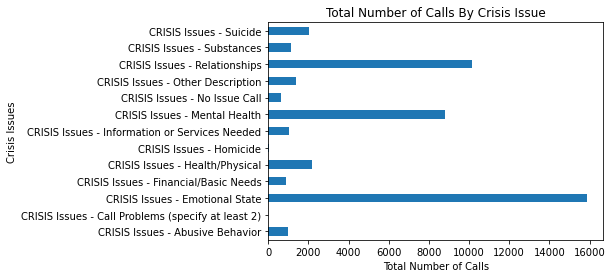

In [6]:
ax = CRISIS.count().plot.barh()
plt.xlabel('Total Number of Calls')
plt.ylabel('Crisis Issues')
plt.title('Total Number of Calls By Crisis Issue')

In [7]:
Crisis_Issues = pd.read_csv('../data/Crisis_Issues.csv')
Crisis_Issues.head(2)

,Abusive Behavior,Call Problems (specify at least 2),Emotional State,Financial/Basic Needs,Health/Physical,Homicide,Information or Services Needed,Mental Health,No Issue Call,Other Description,Relationships,Substances,Suicide,Imminent Risk
0,Abuse/Neglect of Parent/Other Family,Cult/Ritualistic Abuse,Anger/Hostility,"""Half Way"" House/Drug Rehab",Abortion,Chronic Homicidal Thoughts/Ideations,Adoption,Anger Management,Donation Call Only,Natural Disaster,Animal/Pet,Alcohol Information,Chronic Suicidal Thoughts/Ideations,Abuse/Neglect of Spouse/Partner
1,Abuse/Neglect of Spouse/Partner,Home Repair,Anxious/Stressed,Bank Account (overdraft or other issues),Aids/HIV,CURRENT HOMICIDAL INTENTION/PLAN/ATTEMPT IN PR...,Adoption Placement,Anxiety/Panic,Information Call Only,Obscene/Fantasy Call,Blended Family,Alcohol Problem,CURRENT SUICIDAL INTENTION/PLAN/ATTEMPT IN PRO...,Child Sexual Abuse


In [8]:
Crisis_Issues.count()

Abusive Behavior                      29
Call Problems (specify at least 2)     6
Emotional State                       20
Financial/Basic Needs                 30
Health/Physical                       19
Homicide                               9
Information or Services Needed        34
Mental Health                         32
No Issue Call                          3
Other Description                      6
Relationships                         27
Substances                            14
Suicide                                7
Imminent Risk                         27
dtype: int64

Text(0.5, 1.0, 'Total Number of Issues By Crisis Issues')

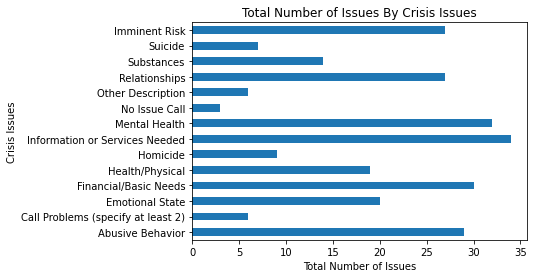

In [9]:
ax = Crisis_Issues.count().plot.barh()
plt.xlabel('Total Number of Issues')
plt.ylabel('Crisis Issues')
plt.title('Total Number of Issues By Crisis Issues')

In [10]:
for c in Crisis.columns:
    if 'Bank Account (overdraft or other issues)' in c: 
        print('++'+c+'++') 

++Bank Account (overdraft or other issues) ++


In [11]:
All_Issues = Crisis[['Child Endangerment',
'Bullying',
'Child Sexual Abuse',
'Other Abusive Behavior',
'Prejudice',
'Child Abuse/Neglect',
'Harassment',
'Mass Violence (Domestic/International)',
'Threat to CIC',
'Abuse/Neglect of Parent/Other Family',
'Cult/Ritualistic Abuse',
'Terrorism (Domestic/International)',
'Adult Abused as a Child',
'Other Physical Abuse/Neglect',
'Abuse/Neglect of Spouse/Partner',
'Gang Violence',
'Pedophile',
'Other Criminal Behavior/Corrections/Felony',
'Hate Crime',
'Rape/Sexual Abuse',
'Anger/Hostility',
'Caregiver Stress',
'Overwhelmed',
'Lonely ',
'School Stress',
'Scared',
'Moving Stress',
'Embarrassed',
'Illness/Health Stress',
'Guilty',
'Emotional Abandonment',
'Financial Stress',
'Holiday Stress',
'Anxious/Stressed',
'Jealous',
'Job Stress',
'Sad/Depressed',
'Content',
'Parenting Stress',
'Bored',
'Housing (permanent)',
'Child Support',
'Payment towards Lawyer or Legal Services',
'Clothing/Toiletries',
'Taxes',
'Rent/Mortgage',
'Transportation',
'Half Way House/Drug Rehab',
'Home Repair',
'Housing (temporary)',
'Car Repair',
'Insurance',
'Credit Card Debt ',
'Food',
'Employment/Job Placement',
'House Keeping/Errands (Seniors)',
'Moving Assistance',
'Utilities',
'Medication/Health Care',
'Home repair/maintenance',
'Bank Account (overdraft or other issues) ',
'Sleep Problems/Disorders',
'Aids/HIV',
'Short-term Illness',
'Weight Loss/Gain ',
'Sexually Transmitted Diseases',
'Cancer',
'Other Physical Health',
'Sexual Dysfunction',
'Terminal Illness',
'Emergency Medical Services',
'Pain',
'Disability/Handicap/Long-Term Illness',
'Diabetes',
'Pregnancy',
'Home Health Care',
'Chronic Homicidal Thoughts/Ideations',
'CURRENT HOMICIDAL INTENTION/PLAN/ATTEMPT IN PROGRESS',
'CURRENT HOMICIDAL THOUGHTS/IDEATIONS',
'Homicidal History/Previous Attempts',
'Third party concerned about anothers homicide risk',
'Domestic violence related homicide',
'Foster/Respite Care',
'Mental Health Counseling',
'Financial Counseling',
'Military/Veterans Services/Military Focused',
'Volunteer',
'Ex-Offender Services',
'Substance Abuse Treatment',
'Information and Referral Services',
'Legal Services',
'Job Training/Career Planning',
'Recreation/Leisure',
'Immigration/Refugees/Migrants',
'Insurance (Medical)',
'Anger Management',
'SOSL Support Group',
'Mobile Crisis ',
'Other Support Group',
'Elder/Senior Rights and Benefits',
'Caregiver Benefits',
'Household Emergency',
'Adoption ',
'Paranoia',
'Autism Spectrum Disorder (diagnosed)',
'Social Injustice',
'Gambling/Compulsive Spending',
'Grief',
'Personality disorder',
'Eating Disorder',
'Medical Related Anxiety ',
'Anxiety/Panic',
'Gender Identity ',
'Emergency (Mental Health)',
'Schizophrenia/Schizoaffective Disorder',
'Trauma/PTSD',
'Auditory/Visual Hallucinations',
'Perfectionism',
'Self-Esteem',
'Pet Grief',
'Moral/Religious Issues',
'Non-Suicidal Self Injury',
'Other Mental Health',
'Phobia',
'Recent psychiatric hospitalization',
'Depression ',
'Codependency',
'Sexual Identity',
'Grief due to Suicide',
'Bipolar Disorder (diagnosed) ',
'Sexual (Addiction Guilt etc.)',
'Donation Call Only',
'Test Call Only',
'Information Call Only',
'Prank Call',
'Under the Influence',
'Politics',
'Natural Disaster',
'Obscene/Fantasy Call',
'Status Improved/Stable',
'Total Other Description Issues',
'Same-Sex Relationship',
'Blended Family',
'Runaway/Missing',
'Employer/Co-Worker',
'Animal/Pet',
'Marital/Divorce',
'Caregiver',
'Custody Issues',
'Concern for Other',
'Case Manager',
'Roommate',
'Clergy',
'Neighbor/Landlord',
'Parent-Child',
'Crisis Counselor',
'Inter-racial/cross-cultural issues',
'Conflict With Other',
'Church',
'Male-Female',
'Single Parent-Child',
'Police',
'Peer Group/Friend',
'Family',
'Therapist/Medical Doctor',
'Teacher/School',
'Other Relationships',
'Alcohol Information',
'Drug (street) Problem',
'Overdose',
'Other Substances',
'Drug (street) Information',
'Medication Concern',
'Recovery/Sobriety',
'Medication Information',
'Medication Dependency',
'Alcohol Problem',
'Detoxification',
'Poisoning',
'Cigarettes',
'Chronic Suicidal Thoughts/Ideations',
'CURRENT SUICIDAL INTENTION/PLAN/ATTEMPT IN PROGRESS',
'Suicide History/Previous Attempts',
'Grief due to Suicide Loss',
'Information about SOSL support group',
'Third party concerned about anothers suicide risk',
'CURRENT THOUGHTS/IDEATIONS',
]]










